## Method of lines (MOL) example

Solve the unsteady diffusion equation using the method of lines.
$$\frac{dy}{dt} = \alpha\frac{d^2y}{dx^2} + S.$$
Assume Dirichlet boundary conditions.

Discretize the equation as:
$$\frac{dy}{dt} = \frac{\alpha}{\Delta x^2}(y_{i-1}-2y_{i}+y_{i+1}) + S.$$
If we write a grid with grid points on the boundaries, we'll solve for the interior points only, and Dirichlet conditions will be implied as the known $y_{i-1}$ and $y_{i+1}$ for $i$ next to the lower and upper boundaries.

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.integrate import odeint
#from byuignite_jet_cm import *

In [45]:
def rhs(y,t): 
    '''
    S, α, Δx are defined globally
    '''
    
    N = len(y)
    dydt = np.zeros(N)      # note, this sets dydt=0 on the 2 bc pts
    i = np.arange(1,N-1)    # interior points
    
    dydt[i] = α/Δx**2.0 * (y[i-1] - 2.0*y[i] + y[i+1]) + S
    
    return dydt

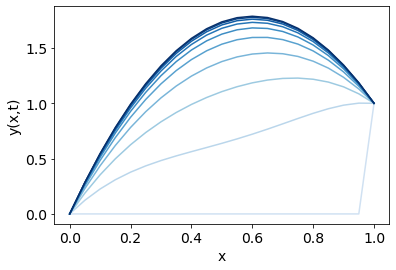

In [51]:
Ldom  = 1.0                   # domain length
N     = 21                    # number of grid pts including boundaries
ybcLo = 0.0                   # low bc
ybcHi = 1.0                   # high bc
S     = 10.0                  # source term
α     = 1.0                   # diffusivity
tend  = 0.5*Ldom**2/α         # integration time

x  = np.linspace(0.0,Ldom,N)  # grid the domain
Δx = x[1]-x[0]
y0 = np.zeros(N)              # Initial condition
y0[0] = ybcLo                 # Known low boundary value
y0[-1]= ybcHi                 # Know high boundary value

#------------- Solve the problem

ntimes = 10
times_to_solve = np.linspace(0.0,tend,ntimes)

y = odeint(rhs, y0, times_to_solve)

#------------- Plot the result

colors = cm.Blues(np.linspace(0.2,1,ntimes))
#colors = byuignite_jet(np.linspace(0,1,ntimes))

plt.rc('font', size=14)
plt.xlabel('x')
plt.ylabel('y(x,t)')
for i in range(ntimes) :
    plt.plot(x,y[i,:],'-', color=colors[i], lw=1.5)
